<a href="https://colab.research.google.com/github/Jasper45678/cs6200-hw1/blob/main/term_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Terms and Documents

This first homework assignment starts off with term statistics computations and graphing. In the final section (for CS6200 students), you collect new documents to experiment with.

Read through this Jupyter notebook and fill in the parts marked with `TODO`.

## Sample Data

Start by looking at some sample data. We donwload the counts of terms in documents for the first one million tokens of a newswire collection.

In [61]:
!wget -O ap201001.json.gz https://github.com/dasmiq/cs6200-hw1/blob/main/ap201001.json.gz?raw=true
!gunzip ap201001.json.gz

--2023-09-21 20:19:19--  https://github.com/dasmiq/cs6200-hw1/blob/main/ap201001.json.gz?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/dasmiq/cs6200-hw1/raw/main/ap201001.json.gz [following]
--2023-09-21 20:19:19--  https://github.com/dasmiq/cs6200-hw1/raw/main/ap201001.json.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dasmiq/cs6200-hw1/main/ap201001.json.gz [following]
--2023-09-21 20:19:19--  https://raw.githubusercontent.com/dasmiq/cs6200-hw1/main/ap201001.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 20

We convert this file with one JSON record on each line to a list of dictionaries.

In [62]:
import json
rawfile = open('ap201001.json')
terms = [json.loads(line) for line in rawfile]

Here are the first ten records, showing the count of each term for each document and field. In this dataset, field only takes the values `body` or `title`.

In [63]:
terms[1:10]

[{'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'about', 'count': 1},
 {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'abuse', 'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'academy',
  'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'accused',
  'count': 2},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'actress',
  'count': 1},
 {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'ad', 'count': 1},
 {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'after', 'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'agenda',
  'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'agreed',
  'count': 1}]

Each record has four fields:
* `id`, with the identifier for the document;
* `field`, with the region of the document containing a given term;
* `term`, with the lower-cased term; and
* `count`, with the number of times each term occurred in that field and document.

## Computing Term Statistics


If we look at the most frequent terms for a given document, we mostly see common function words, such as `the`, `and`, and `of`. Start exploring the dataset by computing some of these basic term statistics. You can make your life easier using data frame libraries such as `pandas`, core python libraries such as `collections`, or just simple list comprehensions.

Feel free to define helper functions in your code before computing the statistics we're looking for.

In [64]:
# TODO: Print the 10 terms from document APW_ENG_20100101.0001 with the highest count.
# import library
import pandas as pd

# Create a DataFrame from the JSON data
df = pd.DataFrame(terms)

# Filter the DataFrame to include only the rows with the specified document ID
document_id = 'APW_ENG_20100101.0001'
filtered_df = df[df['id'] == document_id]

# Group by the 'term' column and sum the 'count' column to get term counts
term_counts = filtered_df.groupby('term')['count'].sum()

# Sort the terms by count in descending order and print the top 10 terms
top_terms = term_counts.sort_values(ascending=False).head(10)

# Print the top 10 terms and their counts
print(top_terms)

term
a         16
the       11
to        10
brooks    10
of        10
and       10
he         9
in         9
gomez      8
for        6
Name: count, dtype: int64


In [65]:
# TODO: Print the 10 terms with the highest total count in the corpus.

# Create a DataFrame from the JSON data
df = pd.DataFrame(terms)

# Group by the 'term' column and sum the 'count' column to get term counts for the entire corpus
corpus_term_counts = df.groupby('term')['count'].sum()

# Sort the terms by count in descending order and print the top 10 terms
top_terms = corpus_term_counts.sort_values(ascending=False).head(10)

# Print the top 10 terms and their counts
print(top_terms)

term
the     62216
to      26931
in      25659
a       23383
of      22326
and     22125
said    10888
for      9716
on       9382
that     8942
Name: count, dtype: int64


Raw counts may not be the most informative statistic. One common improvement is to use *inverse document frequency*, the inverse of the proportion of documents that contain a given term.

In [66]:
# TODO: Compute the number of distinct documents in the collection.
# Create a set to store unique document IDs
unique_document_ids = set()

# Iterate through the terms and add unique document IDs to the set
for term_info in terms:
    doc_id = term_info['id']
    unique_document_ids.add(doc_id)

# Compute the number of distinct documents in the collection
N = len(unique_document_ids)

# Print the number of distinct documents
print(f'Number of distinct documents in the collection: {N}')

Number of distinct documents in the collection: 2778


In [67]:
# TODO: Compute the number of distinct documents each term appears in
# and store in a dictionary.
df = dict()

# Iterate through the terms and count the number of distinct documents each term appears in
for term_info in terms:
    term = term_info['term']
    doc_id = term_info['id']

    if term in df:
        df[term].add(doc_id)
    else:
        df[term] = {doc_id}

# Calculate the number of distinct documents each term appears in
for term, document_set in df.items():
    df[term] = len(document_set)


In [68]:
# TODO: Print the relative document frequency of 'the',
# i.e., the number of documents that contain 'the' divided by N.

# Term for which you want to compute the relative document frequency
term_to_check = 'the'

# Calculate the relative document frequency
if term_to_check in df:
    relative_document_frequency = df[term_to_check] / N
    print(f'Relative Document Frequency of "{term_to_check}": {relative_document_frequency:.4f}')
else:
    print(f'Term "{term_to_check}" not found in the collection.')

Relative Document Frequency of "the": 0.9705


Empricially, we usually see better retrieval results if we rescale term frequency (within documents) and inverse document frequency (across documents) with the log function. Let the `tfidf` of term _t_ in document _d_ be:
```
tfidf(t, d) = log(count(t, d) + 1) * log(N / df(t))
```

Later in the course, we will show a probabilistic derivation of this quantity based on smoothing language models.

In [69]:
# TODO: Compute the tf-idf value for each term in each document.
# Take the raw term data and add a tfidf field to each record.

#import library
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a DataFrame from the JSON data
df = pd.DataFrame(terms)

# Combine terms by document ID
documents = df.groupby('id')['term'].apply(' '.join)

# Create a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the documents to compute tf-idf values
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Convert the tf-idf matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

It took so much time to run by defining a function for tfidf, so I used a TfidVectorizer from sklearn.

reference link:https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [70]:
# Sort the DataFrame by 'tfidf' in descending order and select the top 20 rows
top_20_tfidf_pairs = tfidf_df.stack().reset_index().rename(columns={0: 'tfidf'}).sort_values(by='tfidf', ascending=False).head(20)

# Print the top 20 term-document pairs with the highest tf-idf values
print(top_20_tfidf_pairs)

          level_0     level_1     tfidf
28536603     1086   reopening  0.661006
39459863     1502   reaffirms  0.587749
68163092     2595    shaffner  0.577752
40673931     1548       veron  0.551499
39316219     1497  disastrous  0.547925
8906139       339      closes  0.538301
56466550     2150        gold  0.536328
15312489      583    capsizes  0.536311
24351793      927        gold  0.534203
45945303     1749  prudential  0.531832
44835671     1707     injures  0.527988
25307204      963    riquelme  0.527112
11269086      429      cheney  0.525286
24317563      926   bacharach  0.523116
69129965     2632         omv  0.522536
55093166     2098     bahrain  0.521381
24763966      943   bacharach  0.520591
70318292     2677      sutton  0.516220
40120290     1527     summons  0.515965
40221179     1531  rajaratnam  0.514746


## Plotting Term Distributions

Besides frequencies and tf-idf values within documents, it is often helpful to look at the distrubitions of word frequencies in the whole collection. In class, we talk about the Zipf distribution of word rank versus frequency and Heaps' Law relating the number of distinct words to the number of tokens.

We might examine these distributions to see, for instance, if an unexpectedly large number of very rare terms occurs, which might indicate noise added to our data.

In [71]:
# TODO: Compute a list of the distinct words in this collection and sort it in descending order of frequency.
# Thus frequency[0] should contain the word "the" and the count 62216.

# Create a DataFrame from the JSON data
df = pd.DataFrame(terms)

# Group by the 'term' column and sum the 'count' column to get term counts for the entire corpus
corpus_term_counts = df.groupby('term')['count'].sum()

# Sort the terms by count in descending order
sorted_terms = corpus_term_counts.sort_values(ascending=False)

# Create a DataFrame for the top terms
top_terms_df = sorted_terms.reset_index()
top_terms_df.columns = ['Term', 'Count']

# Convert the top terms DataFrame to a list of lists
frequency = top_terms_df.values.tolist()

# print the first term in the list to check
print(frequency[0])

['the', 62216]


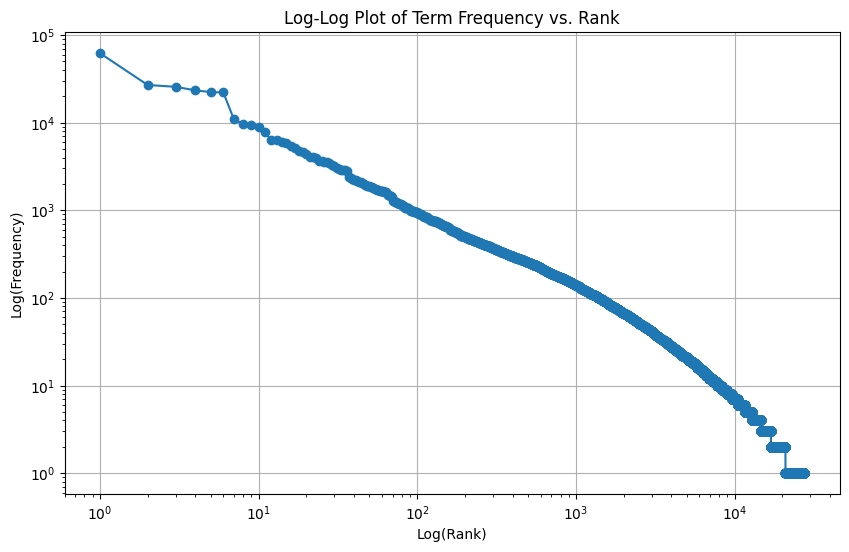

In [72]:
# TODO: Plot a graph of the log of the rank (starting at 1) on the x-axis,
# against the log of the frequency on the y-axis. You may use the matplotlib
# or other library.

# import library
import matplotlib.pyplot as plt

# Calculate the rank (starting at 1)
top_terms_df['Rank'] = range(1, len(top_terms_df) + 1)

# Plot the log-log graph
plt.figure(figsize=(10, 6))
plt.loglog(top_terms_df['Rank'], top_terms_df['Count'], marker='o', linestyle='-')
plt.title('Log-Log Plot of Term Frequency vs. Rank')
plt.xlabel('Log(Rank)')
plt.ylabel('Log(Frequency)')
plt.grid(True)

# Show the plot
plt.show()

In [73]:
# TODO: Compute the number of tokens in the corpus.
# Remember to count each occurrence of each word. For instance, the 62,216
# instances of "the" will all count here.

# Calculate the number of tokens in the corpus
ntokens = sum(term_info['count'] for term_info in terms)

# Print the number of tokens
print(f'Number of tokens in the corpus: {ntokens}')

Number of tokens in the corpus: 1000000


In [74]:
# TODO: Compute the proportion of tokens made up by the top 10 most
# frequent words.


# Calculate the proportion of tokens made up by the top 10 most frequent words
top_10_terms = sorted_terms.head(10)
proportion = top_10_terms.sum() / ntokens

# Print the proportion
print(f'Proportion of tokens made up by the top 10 most frequent words: {proportion:.4f}')

Proportion of tokens made up by the top 10 most frequent words: 0.2216


In [75]:
# TODO: Compute the proportion of tokens made up by the words that occur
# exactly once in this collection.

# Count the number of words that occur exactly once
single_occurrence_words = (corpus_term_counts == 1).sum()

# Calculate the proportion of tokens made up by single-occurrence words
proportion = single_occurrence_words / ntokens

# Print the proportion
print(f'Proportion of tokens made up by words that occur exactly once: {proportion:.4f}')

Proportion of tokens made up by words that occur exactly once: 0.0066


## Acquiring New Documents (for CS6200)

For this assignment so far, you've worked with data that's already been extracted, tokenized, and counted. In this final section, you'll explore acquiring new data.

One common way of acquiring data is through application programming interfaces (APIs) to various databases. The Library of Congress's [_Chronicling America_](https://chroniclingamerica.loc.gov/) site aggregates digitized US newspapers from the past two hundred years, such as the [_Seattle Star_](https://chroniclingamerica.loc.gov/lccn/sn87093407/1923-09-22/ed-1/seq-1/) from 100 years ago.

You can use [the API](https://chroniclingamerica.loc.gov/about/api/) to retrieve JSON data listing all issues of the _Seattle Star_: https://chroniclingamerica.loc.gov/lccn/sn87093407.json

Note the list in the `issues` field. For example, here is the record for the September 22, 1923, issue: https://chroniclingamerica.loc.gov/lccn/sn87093407/1923-09-22/ed-1.json

In that issue record, you'll see records for each page, e.g.: https://chroniclingamerica.loc.gov/lccn/sn87093407/1923-09-22/ed-1/seq-1.json

And inside that page record, you'll see links to data about that page in various data formats, such as JPEG, PDF, and plain text, which is what we want here: https://chroniclingamerica.loc.gov/lccn/sn87093407/1923-09-22/ed-1/seq-1/ocr.txt

This plain text was transcribed from the old page images using optical character recognition (OCR) models, and so contains errors.

Your task is to acquire and analyze the issues of the _Seattle Star_ from the month of September, 1923, i.e., the issues with a date field that starts with `1923-09`. This should be about the same amount of data as the million words from the Associated Press you analyzed in the last section.

**TODO**: Write code that calls the _Chronicling America_ API to download and extract the text from the _Seattle Star_ from September 1923. You can use the `json` library from above and any other libraries you wish to fetch data from URLs. As you would when working with any production API, you may need to limit your rate of requests.

In [76]:
# TODO: Data acquisition code here.

**TODO**: Write code to tokenize the text and count the resulting terms in each document. Since this data comes from automatically transcribing printed pages, some words may be hyphenated across line breaks. There is more than one right way to tokenize this data, so add comments to your code documenting your choices.

In [77]:
# TODO: Tokenization code here.

**TODO**: Plot a graph of the log rank against log frequency for your collection, as you did for the sample collection above.

In [78]:
# TODO: Plotting code here.

**TODO**: What do you observe about the differences between the distributions of the Associated Press and Seattle Star collections? In this text box, give some possible reasons for these differences.